# Tabular classification
- Supervised credit-g classification

In [ ]:

import torch.nn
import torch.optim

import openml
import openml_pytorch
import openml_pytorch.layers
import openml_pytorch.config
import logging


############################################################################
# Enable logging in order to observe the progress while running the example.
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
############################################################################

In [ ]:
from openml_pytorch.trainer import OpenMLTrainerModule
from openml_pytorch.trainer import OpenMLDataModule
from openml_pytorch.trainer import Callback

# Define the Model

In [ ]:
class TabularClassificationmodel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(TabularClassificationmodel, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, output_size)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

In [ ]:
model = TabularClassificationmodel(20, 2)

In [ ]:
# supervised credit-g classification
task = openml.tasks.get_task(31)

/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3577: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)


## Configure the Data Module

In [ ]:
data_module = OpenMLDataModule(
    type_of_data="dataframe",
    target_column="class",
    target_mode="categorical",
)

## Configure the Trainer Module

In [ ]:

trainer = OpenMLTrainerModule(
    data_module=data_module,
    verbose = True,
    epoch_count = 5,
)
openml_pytorch.config.trainer = trainer

## Run the model on the task

In [ ]:
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6143298113787615, tensor(0.6988, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6137924382716049, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


train: [0.6137597731602045, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6136618155020255, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


train: [0.6139356448326582, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6146922923900463, tensor(0.6988, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


train: [0.6138542269483025, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6144284848813657, tensor(0.6988, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6145429069613233, tensor(0.6963, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/functions.py:789: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_datas

train: [0.6135488251109182, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]


train: [0.6132615454402971, tensor(0.7000, device='mps:0')]
valid: [0.6132616255018446, tensor(0.7000, device='mps:0')]
Loss tensor(0.7748, device='mps:0')


In [ ]:
run.publish()

/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/runs/run.py:650: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  predictions = arff.dumps(self._generate_arff_dict())
/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)


OpenML Run
Uploader Name...................: None
Metric..........................: None
Local Result - Accuracy (+- STD): 0.7000 +- 0.0000
Run ID..........................: 10595157
Run URL.........................: https://www.openml.org/r/10595157
Task ID.........................: 31
Task Type.......................: None
Task URL........................: https://www.openml.org/t/31
Flow ID.........................: 24263
Flow Name.......................: torch.nn.TabularClassificationmodel.32873d53d0202561
Flow URL........................: https://www.openml.org/f/24263
Setup ID........................: None
Setup String....................: Python_3.11.9. Torch_2.4.1. NumPy_1.26.4. SciPy_1.14.1. TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
Dataset ID......................: 

In [ ]:
# openml.config.apikey = ''

## View loss

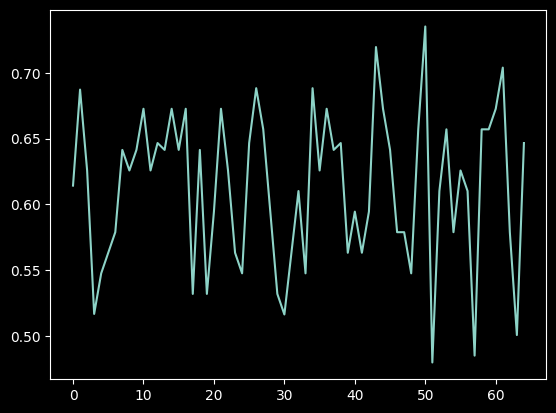

In [ ]:
trainer.runner.cbs[1].plot_loss()

## View learning rate

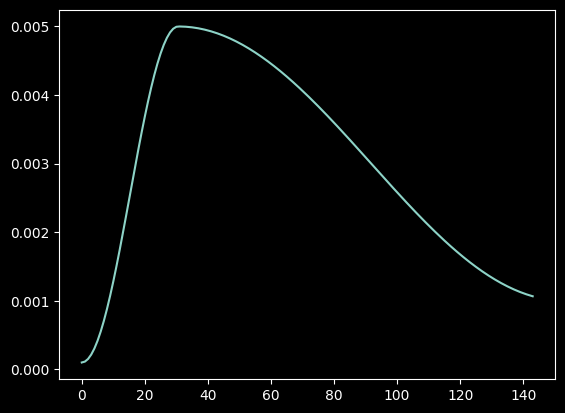

In [ ]:
trainer.runner.cbs[1].plot_lr()